In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-basketball-association-nba/nba-players.csv


# Random Forests VS Linear Model

## Objetivo

O objetivo deste artigo é criar um modelo a partir de Árvores de Decisões, e comparar com um modelo treinado por uma Rede Neural gerada do zero. Vale ressaltar que, ambos modelos foram treinos com o mesmo Data Set

## Conhecendo melhor o dado

In [82]:
df = pd.read_csv('/kaggle/input/national-basketball-association-nba/nba-players.csv')
df

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [83]:
df['target_5yrs'].value_counts()

target_5yrs
1    831
0    509
Name: count, dtype: int64

In [84]:
conts=['gp', 'min', 'pts', 'fgm', 
       'fga', 'fg', '3p_made', '3pa', 
       'ftm', 'fta', 'ft', 'oreb',
       'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov']
dep = 'target_5yrs'

In [85]:
!pip install -Uqq matplotlib pip

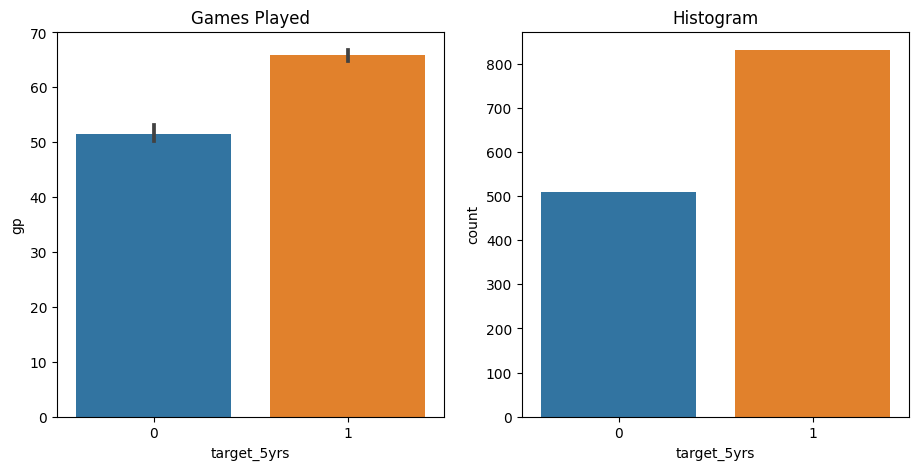

In [86]:
import seaborn as sns
import matplotlib

fig,axs = matplotlib.pyplot.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y="gp", x=dep, ax=axs[0]).set(title="Games Played")
sns.countplot(data=df, x=dep, ax=axs[1]).set(title="Histogram");

Podemos ver a influência que a quantidade de jogos jogados influência de alguma forma a carreira dos jogadores

In [87]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [88]:
conts=['gp', 'min', 'pts', 'fgm', 
       'fga', 'fg', '3p_made', '3pa', 
       'ftm', 'fta', 'ft', 'oreb',
       'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov']
dep = 'target_5yrs'

def xs_y(df):
    xs = df[conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

- **trn_xs**: Contém as entradas do conjunto de treinamento. São as variáveis independentes (features) que serão usadas para treinar o modelo.

- **val_xs**: Contém as entradas do conjunto de validação. São as variáveis independentes (features) que serão usadas para avaliar o desempenho do modelo em dados não vistos durante o treinamento.

- **trn_y**: Contém as saídas correspondentes ao conjunto de treinamento. São as variáveis dependentes (alvos) associadas às entradas do conjunto de treinamento.

- **val_y**: Contém as saídas correspondentes ao conjunto de validação. São as variáveis dependentes (alvos) associadas às entradas do conjunto de validação.

In [89]:
preds = val_xs.gp>40

In [90]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.3194029850746269

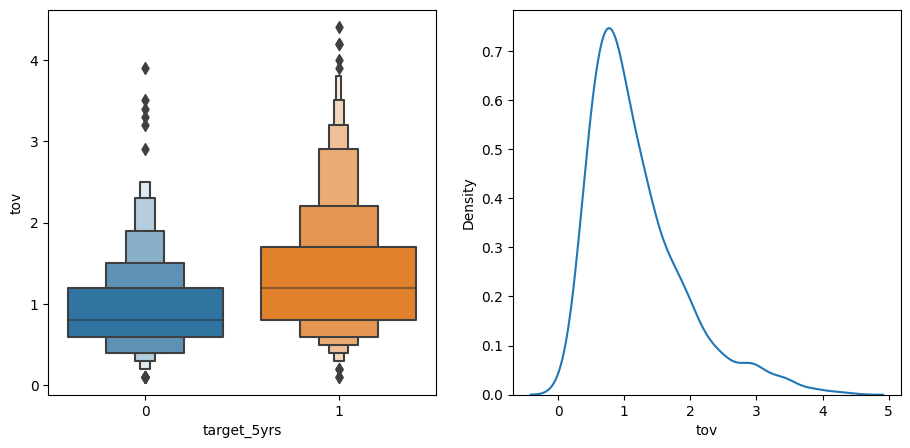

In [91]:
fig,axs = matplotlib.pyplot.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df, x=dep, y="tov", ax=axs[0])
sns.kdeplot(data=df, x="tov", ax=axs[1]);

Mostra que a média de perdas de posse de bola também influência na carreira do jogador

In [92]:
preds = val_xs.tov>0.7
mean_absolute_error(val_y, preds)

0.33432835820895523

In [93]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [94]:
import graphviz
import regex as re

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

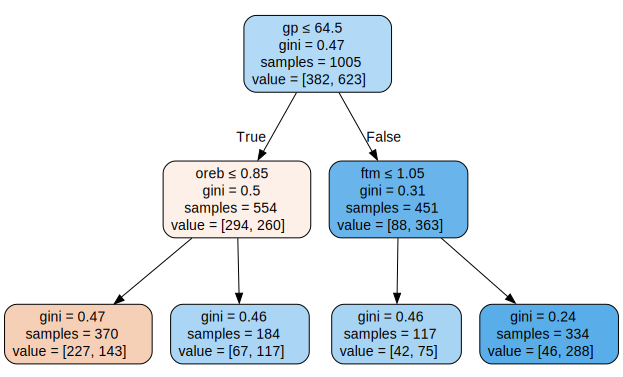

In [95]:
draw_tree(m, trn_xs, size=10)

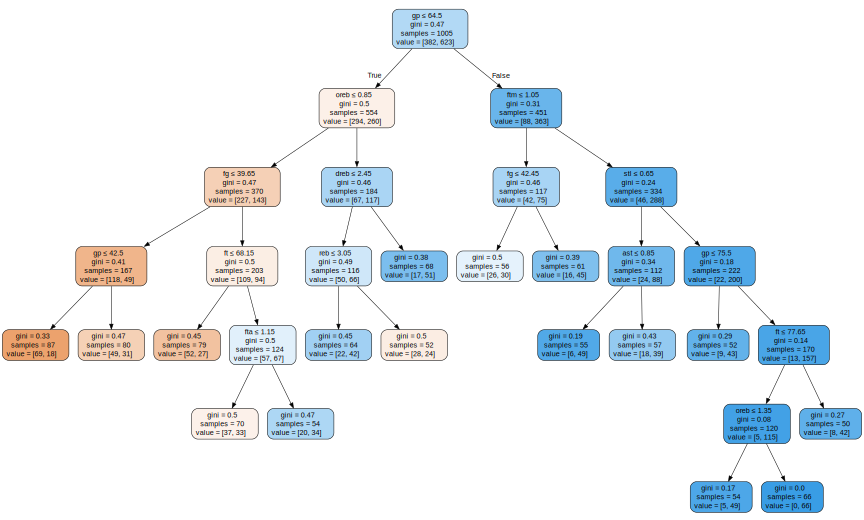

In [96]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [97]:
mean_absolute_error(val_y, m.predict(val_xs))

0.3074626865671642

In [98]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [99]:
trees = [get_tree() for t in range(50)]

In [100]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.375044776119403

In [103]:
def acc(probs):
    predictions = (probs > 0.5).astype(np.float32)
    return np.mean(predictions == val_y)
acc(avg_probs)

0.7014925373134329

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
preds = rf.predict(val_xs)
mean_absolute_error(val_y, pred)

0.3074626865671642

In [131]:
acc(preds)

0.7104477611940299

# Comparação com a Rede Neural

Aqui vamos comparar com um modelo treinado a partir de uma rede neural criada do zero com o mesmo Data Set, sendo que, a rede neural não convergiu.

In [158]:
import torch
import torch.nn.functional as F

model_path = '/kaggle/input/model-basket/model-basket.pkl'

model = torch.load(model_path)

def calc_preds(indeps):
    l1,l2,const = model
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [159]:
t_val = torch.tensor(val_xs[conts].values, dtype=torch.float)
t_preds = calc_preds(t_val)

### Padronizando predições

In [160]:
t_preds = t_preds.detach().numpy().squeeze()
t_preds, preds

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [152]:
acc(t_preds)

0.6208955223880597

## Compração Rede Neural VS Random Forests

In [198]:
print(f'Acurácia Rede Neural: %{acc(t_preds)*100:.2f}, Random Forest: %{acc(preds)*100:.2f}')

Acurácia Rede Neural: %62.09, Random Forest: %71.04


## A Rede Neural realmente prevê?

Abaixo temos a distribuição dos dados que utilizamos para calcular a acurácia, e podemos ver que é a mesma da predição do nosso modelo linear

In [165]:
tmp = (val_y > 0.5).astype(np.float32)
dist = np.mean(tmp == 1.0)
dist

0.6208955223880597

# Exportando o modelo

In [167]:
import joblib
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

### Aplicação no HugginFace

https://huggingface.co/spaces/fastaioncampus/BasketballPlayerDuration